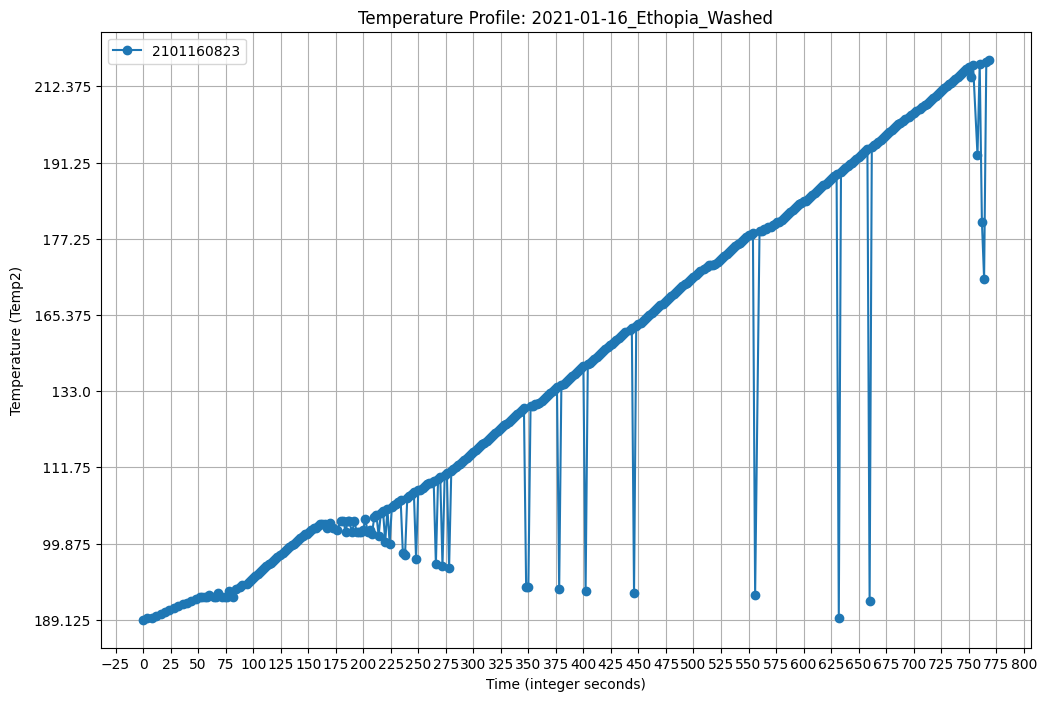

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator

# Load the data, specify the delimiter as semicolon
df = pd.read_csv("SQL.csv", delimiter=";")

# Clean the column names by removing extra spaces and converting to lowercase
df.columns = df.columns.str.strip().str.lower()

# Ensure the 'time' column is numeric and take the integer part
df['time'] = pd.to_numeric(df['time'], errors='coerce').fillna(0).astype(int)

# Ensure 'roasting_batch_id' is a string
df['roasting_batch_id'] = df['roasting_batch_id'].astype(str)

# Ensure the data contains 'roasting_batch_id'
if 'roasting_batch_id' not in df.columns:
    if 'timestamp' in df.columns:  # Ensure 'timestamp' exists
        df['roasting_batch_id'] = df['timestamp'].apply(
            lambda ts: pd.to_datetime(ts).strftime("%y%m%d%H%M")
        )
    else:
        print("Error: 'timestamp' column is missing.")
        raise KeyError("Missing 'timestamp' column in the dataset.")

# Filter data for 'roasting_batch_id' = '2101160823'
group = df[df['roasting_batch_id'] == '2101160823'] #enter specific roasting_batch_id 

# Ensure data is not empty
if not group.empty:
    # Extract 'time' and 'temp2'
    times = group['time']
    temp2 = group['temp2']

    # If the 'timestamp' column exists, get the name format
    if 'timestamp' in group.columns:
        timestamp = group['timestamp'].iloc[0].split(" ")[0]  # Ensure column name matches
    else:
        print("Error: 'timestamp' column is missing in the filtered group.")
        raise KeyError("Missing 'timestamp' column in the filtered group.")
    
    bean_type = group['bean_type'].iloc[0]
    process_type = group['process_type'].iloc[0]
    plot_name = f"{timestamp}_{bean_type}_{process_type}"

    # Plot the line chart
    plt.figure(figsize=(12, 8))
    plt.plot(times, temp2, marker='o', linestyle='-', label='2101160823')
    plt.title(f"Temperature Profile: {plot_name}")
    plt.xlabel("Time (integer seconds)")
    plt.ylabel("Temperature (Temp2)")
    plt.grid(True)
    plt.legend()

    # Set y-axis ticks
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=10))
    # Set x-axis ticks
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, nbins=40))

    # Save or display the chart
    # plt.savefig(f"{plot_name}.png")
    plt.show()

else:
    print("No data available for roasting_batch_id '2101160823'.")
